Consider running the decision-tree algorithm on the diabetes data with the goal of producing trees with more and more leaves. When the tree has 20 leaves, what do you think about the rule that is learned? Is it easy to understand? Do you think it is likely to generalize well to new instances?

In [1]:
from sklearn import tree
import graphviz 
import random
import matplotlib.pyplot as plt

We download the data from plotly.

In [2]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2020-07-01 23:13:00--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.004s  

2020-07-01 23:13:00 (6.21 MB/s) - ‘diabetes.csv’ saved [23873/23873]



Next, we'll manually process the data from its comma separated value (csv) format

In [3]:
with open("diabetes.csv", "r") as f:
    data = f.readlines()
feats = data[0]
feats = feats.replace('\n','')
feats = feats.split(",")
feats = feats[0:(len(feats)-1)]	
alldat = []				
alllabs = []			
for i in range(1,len(data)):	
     line = data[i]		
     line = line.replace('\n','')		
     csvline = line.split(",")		
     alllabs = alllabs + [int(csvline[len(csvline)-1])]
     csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
     alldat = alldat + [csvline]	

We next will create a `trainmask` and use it to create the train, test data.

In [5]:
trainmask = [random.randint(0,2) for i in range(len(alldat))]

traindat = [alldat[i] for i in range(len(alldat)) if trainmask[i]]
trainlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]]
testdat = [alldat[i] for i in range(len(alldat)) if not trainmask[i]]
testlabs = [alllabs[i] for i in range(len(alldat)) if not trainmask[i]]

Using scikit-learn, a machine-learning library in Python, we'll train a decision tree with 20 decision rules and fit it to our data and labels.

In [6]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 20)	
clf = clf.fit(traindat, trainlabs)			

Finally, we'll visualize our decision tree

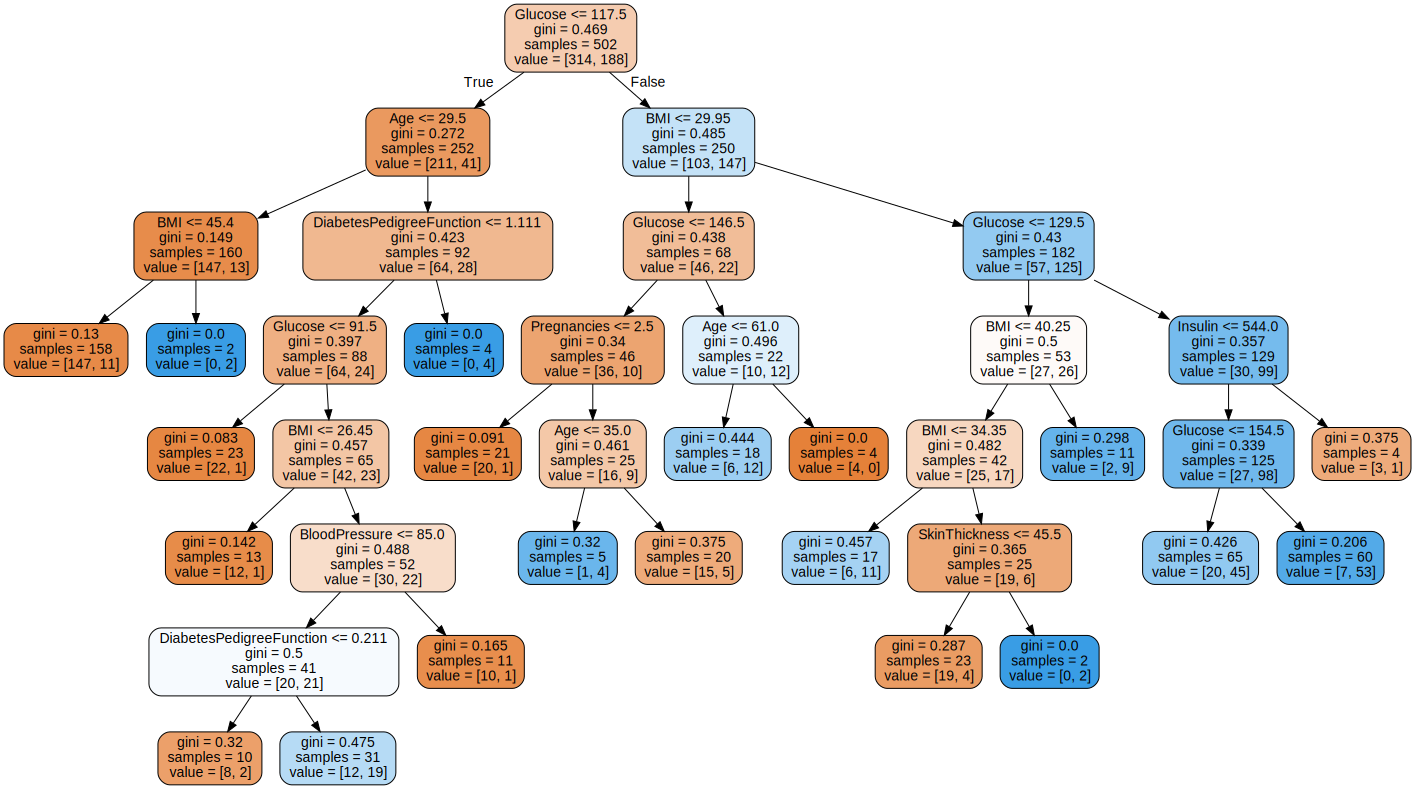

In [7]:
dot_data = tree.export_graphviz(clf, feature_names=feats,
                      filled=True, rounded=True) 
graph = graphviz.Source(dot_data)	
graph	

We now will fit different classifier models, varying the number of splits.  We then will calculate the training and test error of each model.

In [ ]:
trainerr = []
testerr = []
nleaves = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,50]
for leaves in nleaves:
  clf = tree.DecisionTreeClassifier(max_leaf_nodes = leaves)
  clf.fit(traindat, trainlabs)  

  pred = clf.predict(traindat)
  trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
  pred = clf.predict(testdat)
  testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]

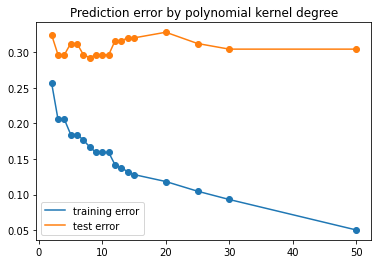

In [ ]:
plt.scatter(nleaves, trainerr)
plt.plot(nleaves, trainerr, label='training error')
plt.scatter(nleaves, testerr)
plt.plot(nleaves, testerr, label='test error')
plt.legend()
plt.title('Prediction error by polynomial kernel degree')
plt.show()